# 1. Calculation methodology

## Salary brackets
From 2024: For newcomers who became eligible from 1 January 2024 onward, the tax-exempt benefit now follows a laddered structure over the five-year period:

**30% tax-free for the first 20 months**
**20% tax-free for the next 20 months**
**10% tax-free for the final 20 months**

Applicants with a ruling in place before 2024 are grandfathered, meaning they continue to enjoy the full 30% tax-free allowance for up to five years under the old rules.But a reversal is already underway. Following widespread criticism, the government decided to reverse the 30-20-10 structure:

From 1 January 2025 through 31 December 2026, all eligible expats (including new ones) will receive a **flat 30% tax-free allowance**, without scaling. Then, starting 1 January 2027, the allowance will be permanently **adjusted to a flat 27%**, with updated salary thresholds.

The 2025 Tax Plan, including the amendments, still requires approval from the Dutch Parliament. Should the proposals be adopted, these changes may have implications for certain employees.

## Maximum allowable salary for 30% ruling

30% facility applies to amounts up to €233,000
The tax-free allowance applies to salary amounts of up to €233,000 a year (amount for 2024).

https://www.belastingdienst.nl/wps/wcm/connect/en/individuals/content/coming-to-work-in-the-netherlands-30-percent-facility


## Expertise Requirements

To qualify for the 30%-ruling, an incoming employee must possess specific expertise that is either not available or scarcely available in the Dutch labor market. This expertise requirement is primarily determined based on a salary norm.

Your specific expertise is hardly found on the labour market in the Netherlands. You have a specific expertise if your annual salary, not including the tax-free allowance in the Netherlands, is more than the annual salary in the table.

Table: specific expertise
Year	Your annual salary is more than
**2025	€46,660**
2024	€46,107
2023	€41,954

You are younger than 30, and you have a Dutch academic master's degree
Or you have obtained an equivalent title in another country. You have a specific expertise if your annual salary, not including the tax-free allowance in the Netherlands, is more than the annual salary in the table.
Table: specific expertise for people younger than 30
Year	Your annual salary is more than
**2025	€35,468**
2024	€35,048
2023	€31,891

https://www.belastingdienst.nl/wps/wcm/connect/en/individuals/content/coming-to-work-in-the-netherlands-30-percent-facility




# 2.Data Schema

### Data Inputs

Age: integer  
Base_salary: Gross, expected to earn once relocated  
Duration_years: Expected to remain in the Netherlands, if omitted  assumed 10 years  
Start_Date: Date when expected to start the job
Expertise: Boolean (if posseses specific expertise not available)  
Master_dpl: Boolean (if possesses Dutch academic master degree)

### Parameters
Salary_cap: Maximum salary on which 30% ruling is applied  
Salary_req_young: Salary requirements young professional
Salary_expert: Salary for employee with specific expertise

### Function

Function will consume data inputs and parameters and will return a  
dictionary of values for each subsequential year employee will work in  
the Netherlands and the respective Gross Salary which will be taxed







---



In [12]:
import pandas as pd
import datetime

from datetime import datetime, date, time, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


# 3.Code

### Function calculating taxable income: return taxable income 

In [27]:
def apply_ruling(base_salary: float, months_dur: int, year: int, year_seq: int):
  # base_salary -> annual
  # function derives gross salary net of 30% taxes
  # months_dur -> months when 30% ruling will be applied
  # year_seq: which year we deal with: 0 -> first, 1 -> intermeidate year, 2-> last, 3-> no 30% ruling

    if year in (2025, 2026) and year_seq == 0:
      # 30% ruling on months applied
      gross_taxable = (base_salary - (base_salary * 0.3)) / 12 * months_dur
    elif year in (2025, 2026) and year_seq == 1:
      # in case 2025, 2025 not first year -> full year 30% ruling
      gross_taxable = base_salary - (base_salary * 0.3)
    elif year not in (2025, 2026) and year_seq == 1:
      # in case 2026 or later and 27% ruling whole year
      gross_taxable = base_salary - (base_salary * 0.27)
    elif year not in (2025, 2026) and year_seq == 2:
      # in case 2026 or later and 27% ruling part of the year
      gross_taxable = ((base_salary - (base_salary * 0.27)) / 12 * months_dur) + (base_salary / 12 * (12 - months_dur))
    else:
      # no 30% ruling and year later than 2026
      gross_taxable = base_salary

    return gross_taxable

### Function to adjust salary for high earners

In [14]:
def adjust_highearner(my_dict, salary: int):
# CONSUMES DICTIONARY WITH VALUES FOR HIGH EARNER, RETURNS MODIFIED DICT #
# CALCULATES TAXABLE INCOME HIGH EARNER SALARY > 233k                    #
##########################################################################

    surplus = salary - 233000

    for key in my_dict:
        my_dict[key] = my_dict[key] + surplus
        print(my_dict[key])

    return None

### Function calculates range of values for taxable income over many years based on user inputs

In [60]:
def expat_ruling_calc(age: int, salary: float, date_string: str, duration: int = 10,
                      expertise: bool = False, master_dpl: bool = False):

  # INITIATE KEY PARAMETERS
  salary_cap = 233000
  salary_req_young = 35468
  salary_expert = 46660

  # DETERMINE MONTHS REMAINING IN FIRST YEAR & LAST YEAR
  # date_string = "2024-12-25"

  start_date = datetime.strptime(date_string, "%Y-%m-%d")

  # DETERMINE CURRENT YEAR
  current_year = start_date.year

  months_remaining_init = 12 - start_date.month + 1
  months_remaining_final = 12 - months_remaining_init

  # YEARS SEQUENCE
  # CREATE A SEQUENCE OF YEARS EXPECTED TO BE EMPLOYED IN NL
  # CREATE DICTIONARY TO KEEP VALUES IN

  years_sequence = list(range(current_year, current_year + duration))
  my_dict = {}
  my_key = years_sequence

  for key in my_key:
    my_dict[key] = ""

  # CHECK IF 30% RULING WILL APPLY

  if age < 30 and expertise == True and master_dpl == True and salary >= salary_req_young:
        Ruling_test = True
  elif age >= 30 and expertise == True and salary >= salary_expert:
        Ruling_test = True
  else:
        Ruling_test = False

  # CALCULATION BASE
  # base_salary -> salary used for calculating taxable income

  base_salary = salary


  if base_salary > salary_cap:
        base_salary = salary_cap

  keys_list = list(my_dict.keys())  # Get the tuple
  keys = list(keys_list)  # Convert tuple to list: ['A', 'B', 'C']

  # CHECKING IF THERE IS A BROKEN YEAR AND CALCULATING THESE PARTS #
  ##################################################################

  if Ruling_test == True:

    year1 = apply_ruling(base_salary, months_remaining_init, int(keys_list[0]), 0)
    my_dict[keys[0]] = year1

  # if broken year ruling

    if months_remaining_init == 12:
        year5 = apply_ruling(base_salary, 12, int(keys_list[4]), 2)
        my_dict[keys[4]] = year5
    else:
        year6 = apply_ruling(base_salary, months_remaining_final, int(keys_list[5]), 2)
        my_dict[keys[5]] = year6

    my_dict[keys[0]] = year1


    # other years -not first and last years
    # depends on full or broken year
    if months_remaining_init == 12:
        other_years_sequence = list(keys_list[1:5])
    else:
        other_years_sequence = list(keys_list[1:6])

    print(other_years_sequence)

    for key in other_years_sequence:
      if key >= 2027:
        # new 27% ruling
        my_dict[key] = apply_ruling(base_salary, 12, int(key), 1)
      else:
        # apply 30% ruling
        my_dict[key] = apply_ruling(base_salary, 12, int(key), 1)

    # populating remainder of the dictionary - no ruling
    if months_remaining_init == 12:
        for key in keys_list[5:]:
            my_dict[key] = float(base_salary)
    else:
        for key in keys_list[6:]:
            my_dict[key] = float(base_salary)

 # check if the salary > 233K and adjust

    res = {}
    if salary > salary_cap:
        res = adjust_highearner(my_dict, salary)
        my_dict = res
        return my_dict
    else:
        return my_dict

  elif Ruling_test == True:
  # ruling not applicable populate everything with gross salary
    for key in keys_list:
      my_dict[key] = float(base_salary)


In [62]:
my_dict = expat_ruling_calc(35, 100000, "2025-01-01", 10, True, True)
my_dict

[2026, 2027, 2028, 2029]


{2025: 70000.0,
 2026: 70000.0,
 2027: 73000.0,
 2028: 73000.0,
 2029: 73000.0,
 2030: 100000.0,
 2031: 100000.0,
 2032: 100000.0,
 2033: 100000.0,
 2034: 100000.0}

### Functions to calculate tax and derive two deductables from tax

In [64]:
def calc_tax(gross_salary: float) -> float:

    # --- 1) Guardrail: input should be non-negative
    if gross_salary < 0:
        raise ValueError("gross_salary must be non-negative")

    # --- 2) Define the 2025 Box 1 brackets as (upper_limit, rate)
    # Bracket 1: 0        .. 38,441  -> 35.82%
    # Bracket 2: 38,441   .. 76,817  -> 37.48%
    # Bracket 3: 76,817   .. +inf    -> 49.50%
    # We implement these as cumulative upper bounds. The last one is infinity.
    brackets: List[Tuple[float, float]] = [
        (38_441.00, 0.3582),
        (76_817.00, 0.3748),
        (float("inf"), 0.4950),
    ]

    # assume taxable income is gross salary
    taxable_income = gross_salary

    # Walk the brackets and accumulate tax per slice
    tax = 0.0
    lower_limit = 0.0

    for upper_limit, rate in brackets:
        # Income that falls inside THIS bracket:
        #   from the current lower_limit up to the bracket's upper_limit,
        #   but never exceeding taxable_income.
        slice_amount = max(0.0, min(taxable_income, upper_limit) - lower_limit)
        if slice_amount <= 0:
            # No taxable income left for this or further brackets.
            break
        # Tax for this slice = slice_amount * rate
        tax += slice_amount * rate
        # Move the lower bound up to this bracket's upper limit
        lower_limit = upper_limit
        # If we've already taxed the entire taxable_income, stop early
        if taxable_income <= upper_limit:
            break

    # Net income = full gross - tax
    net_income = gross_salary - tax

    # Return with cents precision
    return round(tax, 2)


In [65]:
def bereken_arbeidskorting(salaris):
    """
    Berekent de arbeidskorting voor Nederland 2025 op basis van het brutosalaris.
    De arbeidskorting heeft 4 fases:
    - Fase 1 (€0 - €11.491): 0% korting
    - Fase 2 (€11.491 - €24.821): Opbouw van 31,15%
    - Fase 3 (€24.821 - €39.958): Plateau van €4.152
    - Fase 4 (€39.958 - €124.934): Afbouw van 6%
    - Boven €124.934: Geen arbeidskorting
    Args:
        salaris (float): Het bruto jaarsalaris in euro's
    Returns:
        float: De arbeidskorting in euro's
    """

    # Grenzen en tarieven arbeidskorting 2025
    GRENS_1 = 11491    # Ondergrens voor arbeidskorting
    GRENS_2 = 24821    # Einde opbouwfase
    GRENS_3 = 39958    # Einde plateau
    GRENS_4 = 124934   # Bovengrens arbeidskorting

    OPBOUW_TARIEF = 0.3115    # 31,15% opbouw in fase 2
    MAX_KORTING = 4152        # Maximum arbeidskorting (plateau)
    AFBOUW_TARIEF = 0.06      # 6% afbouw in fase 4

    # Input validatie
    if salaris < 0:
        raise ValueError("Salaris kan niet negatief zijn")

    # Fase 1: €0 - €11.491 (geen korting)
    if salaris <= GRENS_1:
        return 0.0

    # Fase 2: €11.491 - €24.821 (opbouw 31,15%)
    elif salaris <= GRENS_2:
        opbouw_bedrag = salaris - GRENS_1
        korting = opbouw_bedrag * OPBOUW_TARIEF
        return round(korting, 2)

    # Fase 3: €24.821 - €39.958 (plateau €4.152)
    elif salaris <= GRENS_3:
        return MAX_KORTING

    # Fase 4: €39.958 - €124.934 (afbouw 6%)
    elif salaris <= GRENS_4:
        afbouw_bedrag = salaris - GRENS_3
        afbouw = afbouw_bedrag * AFBOUW_TARIEF
        korting = MAX_KORTING - afbouw
        return round(max(korting, 0), 2)  # Minimum 0

    # Boven €124.934: geen arbeidskorting meer
    else:
        return 0.0


In [66]:
def bereken_algemene_heffingskorting(salaris):
    """
    Berekent de algemene heffingskorting voor Nederland 2025 op basis van het brutosalaris.
    De algemene heffingskorting heeft 3 fases:
    - Fase 1 (€0 - €24.812): Volledige korting van €3.362
    - Fase 2 (€24.812 - €76.421): Afbouw van 6,007% per euro boven €24.812
    - Fase 3 (boven €76.421): Geen algemene heffingskorting meer

    Args:
        salaris (float): Het bruto jaarsalaris in euro's
    Returns:
        float: De algemene heffingskorting in euro's
    """

    # Grenzen en tarieven algemene heffingskorting 2025
    MAXIMUM_KORTING = 3362      # Maximum algemene heffingskorting
    AFBOUW_ONDERGRENS = 24812   # Vanaf dit bedrag begint afbouw
    AFBOUW_BOVENGRENS = 76421   # Boven dit bedrag is er geen korting meer
    AFBOUW_TARIEF = 0.06007     # 6,007% afbouw per euro boven de ondergrens

    # Input validatie
    if salaris < 0:
        raise ValueError("Salaris kan niet negatief zijn")

    # Fase 1: €0 - €24.812 (volledige korting)
    if salaris <= AFBOUW_ONDERGRENS:
        return MAXIMUM_KORTING

    # Fase 2: €24.812 - €76.421 (afbouw 6,007%)
    elif salaris <= AFBOUW_BOVENGRENS:
        afbouw_bedrag = salaris - AFBOUW_ONDERGRENS
        afbouw = afbouw_bedrag * AFBOUW_TARIEF
        korting = MAXIMUM_KORTING - afbouw
        return round(max(korting, 0), 2)  # Minimum 0

    # Fase 3: Boven €76.421 (geen korting meer)
    else:
        return 0.0


### Addition of the fixed costs to the analysis

In [67]:
fixed_costs = {
    "housing": 1200,
    "utilities": 300,
    "groceries": 400,
    "transportation": 150,
    "health_insurance": 157,
}

In [78]:
my_dict = expat_ruling_calc(35, 120000, "2025-10-01", 7, True, True)
my_dict

[2026, 2027, 2028, 2029, 2030]


{2025: 21000.0,
 2026: 84000.0,
 2027: 87600.0,
 2028: 87600.0,
 2029: 87600.0,
 2030: 87600.0,
 2031: 120000.0}

In [79]:
# CONVERTING TO PANDA DATAFRAME AND ADDING OTHER PARAMETERS
df = pd.DataFrame(list(my_dict.items()), columns=["Year", "Taxable Income"])

# ADDING FIXED COSTS FROM DICTIONARY
fixed_costs_total = sum(fixed_costs.values()) if fixed_costs else 0
df["Fixed Costs"] = fixed_costs_total

# CALCULATING TAX
df["Tax"] = round(-df["Taxable Income"].apply(calc_tax), 0)

# CALCULATING DEDUCTABLES
df["Arbeidskorting"] = round(df["Taxable Income"].apply(bereken_arbeidskorting),0)
df["Algemene Heffingskorting"] = round(df["Taxable Income"].apply(bereken_algemene_heffingskorting),0)

# CALCULATING NETTO INCOME AFTER TAX & FIXED EXPENSES
df["Netto Disposable"] = df["Taxable Income"] + (df["Tax"] + df["Arbeidskorting"] + df["Algemene Heffingskorting"]) - df["Fixed Costs"]

# CALCULATING NET TAX
df["Net Tax"] = df["Tax"] - (df["Arbeidskorting"] + df["Algemene Heffingskorting"])


df

,Year,Taxable Income,Fixed Costs,Tax,Arbeidskorting,Algemene Heffingskorting,Netto Disposable,Net Tax
0,2025,21000.0,2207,-7522.0,2962.0,3362.0,17595.0,-13846.0
1,2026,84000.0,2207,-31708.0,1509.0,0.0,51594.0,-33217.0
2,2027,87600.0,2207,-33490.0,1293.0,0.0,53196.0,-34783.0
3,2028,87600.0,2207,-33490.0,1293.0,0.0,53196.0,-34783.0
4,2029,87600.0,2207,-33490.0,1293.0,0.0,53196.0,-34783.0
5,2030,87600.0,2207,-33490.0,1293.0,0.0,53196.0,-34783.0
6,2031,120000.0,2207,-49528.0,0.0,0.0,68265.0,-49528.0


### Graphs

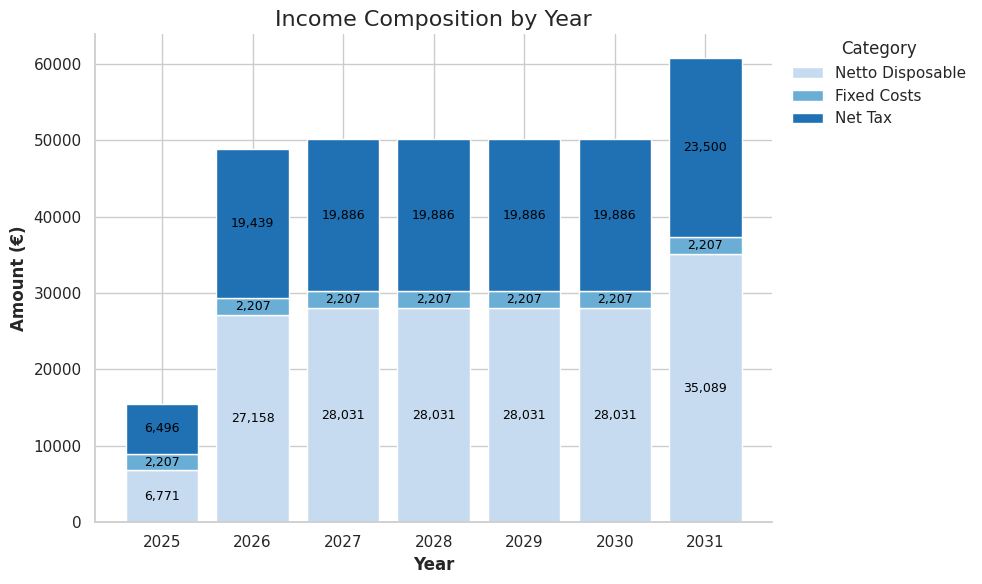

In [77]:
# Prepare data
plot_df = df[['Year', 'Netto Disposable', 'Fixed Costs', 'Net Tax']].copy()
plot_df['Net Tax'] = plot_df['Net Tax'].abs()
plot_df['Year'] = plot_df['Year'].astype(str)

# Set style
sns.set_theme(style="whitegrid")

# Use Blues sequential palette
colors = sns.color_palette("Blues", n_colors=3)  # 3 shades for 3 categories

# Plot stacked bars
fig, ax = plt.subplots(figsize=(10,6))

bottom = None
categories = ['Netto Disposable', 'Fixed Costs','Net Tax']
for i, cat in enumerate(categories):
    ax.bar(
        plot_df['Year'],
        plot_df[cat],
        label=cat,
        bottom=bottom,
        color=colors[i]
    )

    # Annotate inside each segment
    for x, y, b in zip(plot_df['Year'], plot_df[cat], bottom if bottom is not None else [0]*len(plot_df)):
        if y > 0:
            ax.text(
                x, b + y/2, f"{y:,.0f}",
                ha='center', va='center',
                fontsize=9, color="black",
            )

    bottom = plot_df[categories[:i+1]].sum(axis=1)

# Titles & labels
ax.set_title("Income Composition by Year", fontsize=16)
ax.set_ylabel("Amount (€)", fontsize=12, weight='bold')
ax.set_xlabel("Year", fontsize=12,weight='bold')

# Legend outside
ax.legend(
    title="Category",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    frameon=False
)

sns.despine()
plt.tight_layout()
plt.show()
